In [10]:
#Import de benodigde libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

In [48]:
'Alle standaard variabelen klaarzetten.'
#tijd, en tijdstappen
teind = 100
Nstap = 100000+1
tijd = np.linspace(0, teind, Nstap)
dt = teind/(Nstap-1)

# Eigen aangereikte parameters, bijzonder per student.
k = 1.2808 #N/m
m = 5.1909*10**-6 #microgram
c = 2.3297*10**-6 #kg/s

#Uitgerekende waardes voor de diferentiaal vergelijking.
a = (k - 2*m/(dt**2))/(m/(dt**2)+c/(2*dt))
b = (m/(dt**2)-c/(2*dt))/(m/(dt**2)+c/(2*dt))

# Start Waardes
x0 = 0
v0 = 0

# Aangereikte Kracht
F0 = 60*10**-9
F0e = F0/(m/(dt**2)+c/(2*dt))

# Berekenen van de eigen frequentie
res_f = 1/(np.sqrt((m/k))*2*np.pi)
f = res_f
print(f)

79.05684159870837


In [4]:
'Berekenen van de uitwijking'
#Een lijst maken die even lang is als de tijd, zodat 
x = np.zeros_like(tijd)
x[0] = x0
x[1] = x0+dt*v0

for ti in range(1,Nstap-1):
    x[ti+1]=-a*x[ti]-b*x[ti-1]+F0e*np.sin(2*np.pi*f*tijd[ti])
print(len(x))

100001


In [23]:
stabiel = np.amax(x[round(0.8*Nstap):-1])
uitrekking_veer = F0e/k
print("Uitrekking veer bij statische kracht = " + str(F0e/k))
print("Amplitude nadat het systeem gestabiliseerd is = " + str(np.amax(x[round(0.8*Nstap):-1])))
print('qfactor = ' + str(stabiel/uitrekking_veer))

Uitrekking veer bij statische kracht = 9.02256092277236e-09
Amplitude nadat het systeem gestabiliseerd is = 2.29504402746069e-06
qfactor = 254.3672519481855


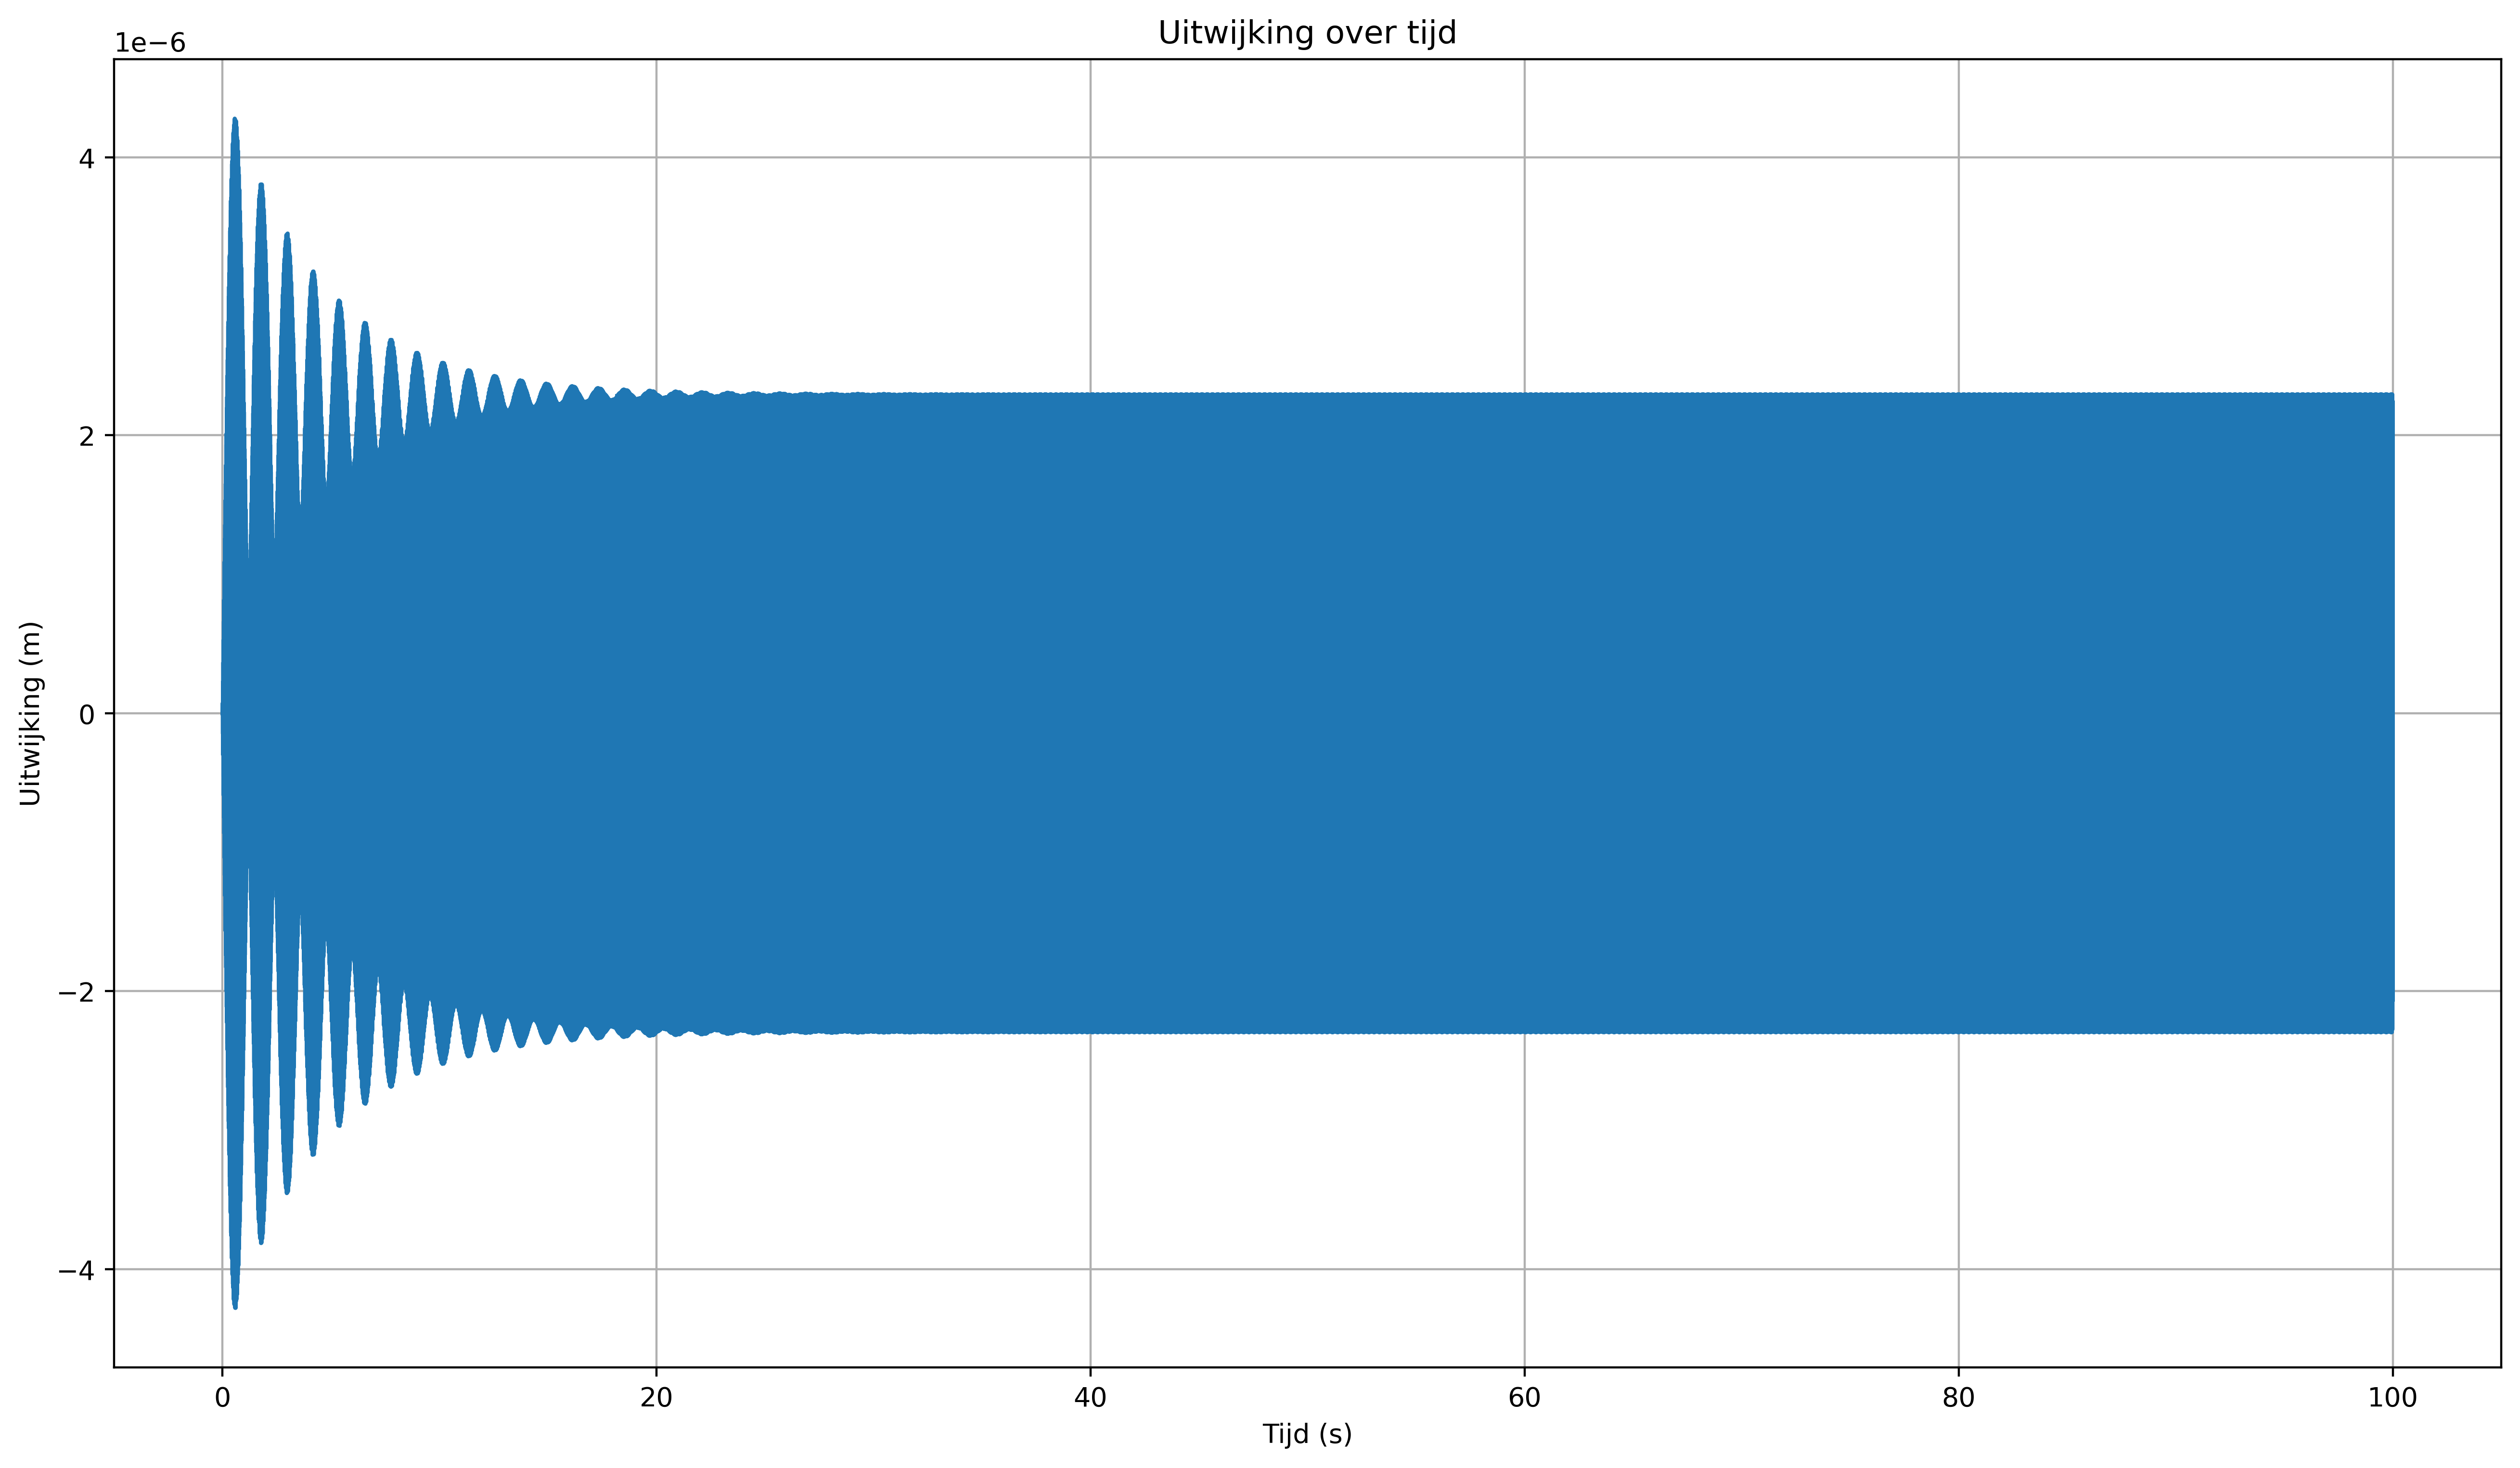

In [14]:
plt.figure(figsize=(16,9), dpi=400)
plt.xlabel("Tijd (s)")
plt.ylabel("Uitwijking (m)")
plt.title("Uitwijking over tijd")
plt.grid()
plt.plot(tijd, x)

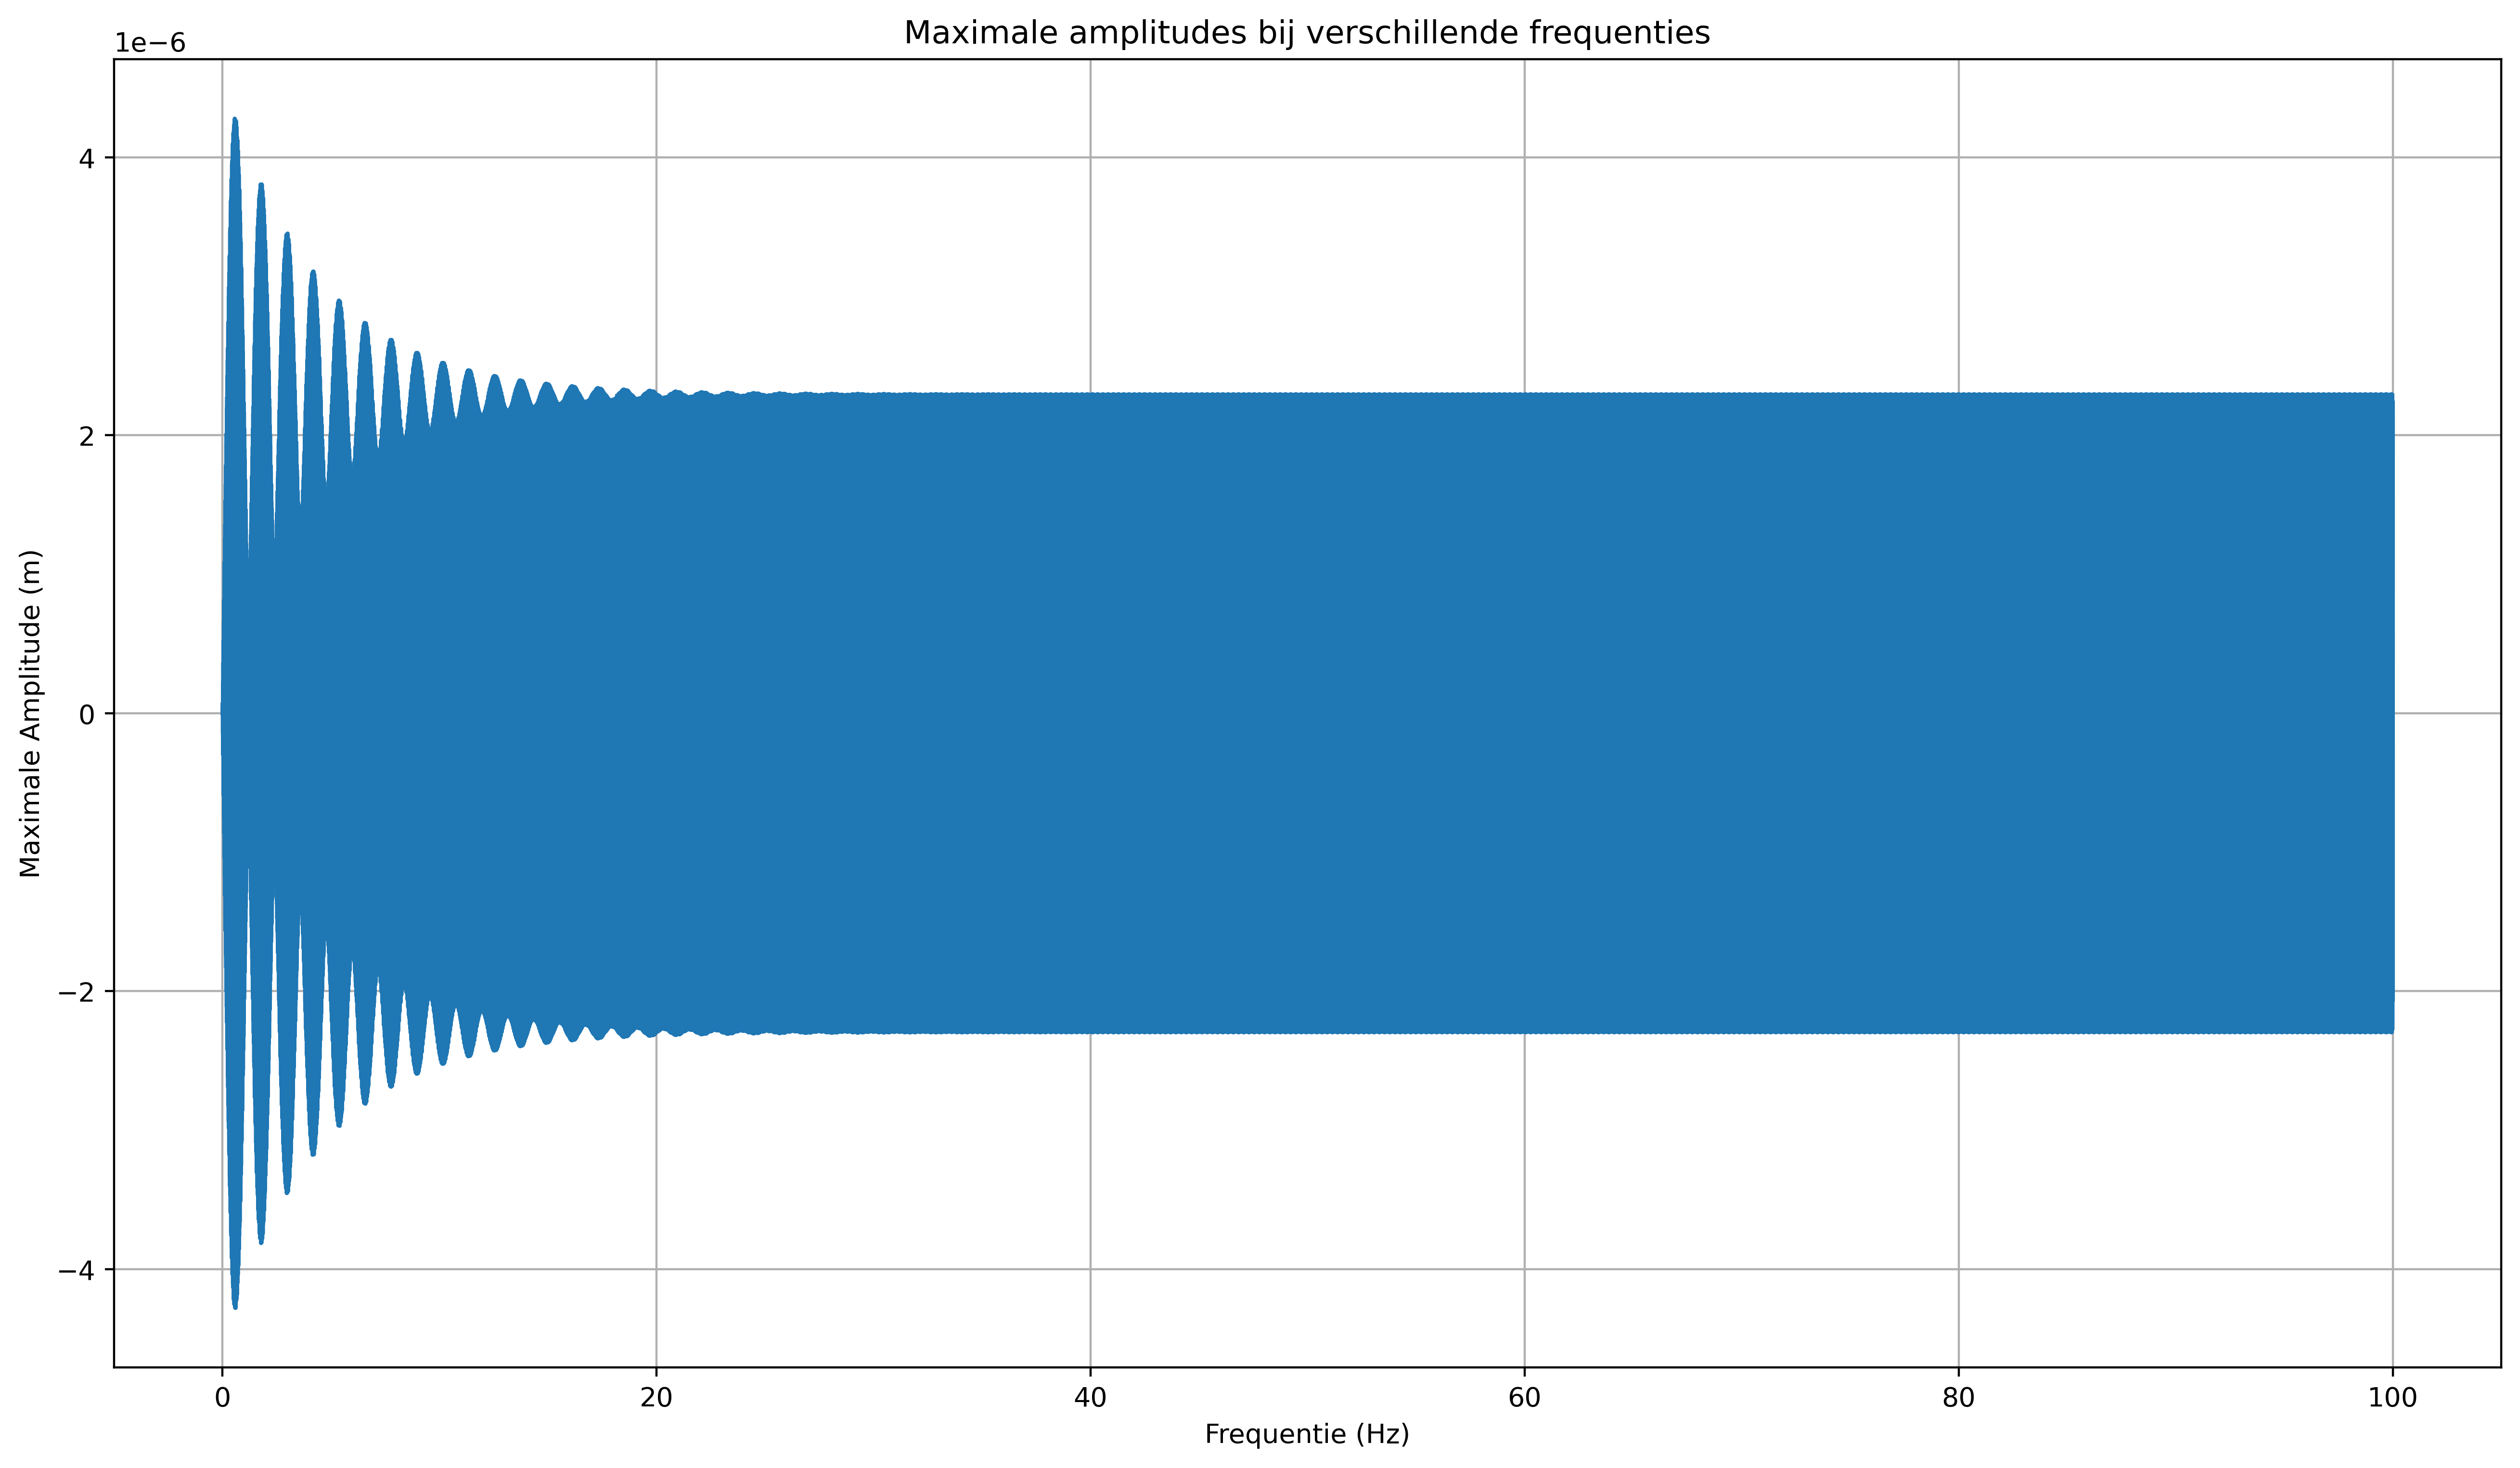

In [24]:
Nf = 3000+1
fmax = f + f/5
fmin = f - f/5
freqs = np.linspace(fmin,fmax,Nf)
MaxAmps = np.zeros_like(freqs)

In [25]:
for fi in range(Nf):
    x[0] = x0
    x[1] = x0+dt*v0
    for ti in range(1,Nstap-1):
        x[ti+1]=-a*x[ti]-b*x[ti-1]+F0e*np.sin(2*np.pi*freqs[fi]*tijd[ti])
    MaxAmps[fi]=np.amax(x[round(0.8*Nstap):-1])

In [31]:
FWHM = np.amax(MaxAmps)/2
Max_FWHM = FWHM + FWHM/5
Min_FWHM = FWHM - FWHM/5
#print(FWHM)
#result = np.where(MaxAmps == FWHM)
#print(result)

FWHM2 = np.where(np.logical_and(MaxAmps>=Min_FWHM, MaxAmps<=Max_FWHM))
FWHM_top = freqs[FWHM2]
FWHM_plot = FWHM_top[-1] - FWHM_top[0])
print(FWHM_top)
print("FWHM = " + str(FWHM_top[-1] - FWHM_top[0]))

[79.81578728 79.82632819 79.8368691  79.94227822 79.95281914 79.96336005
 79.97390096]
FWHM = 0.15811368319741348


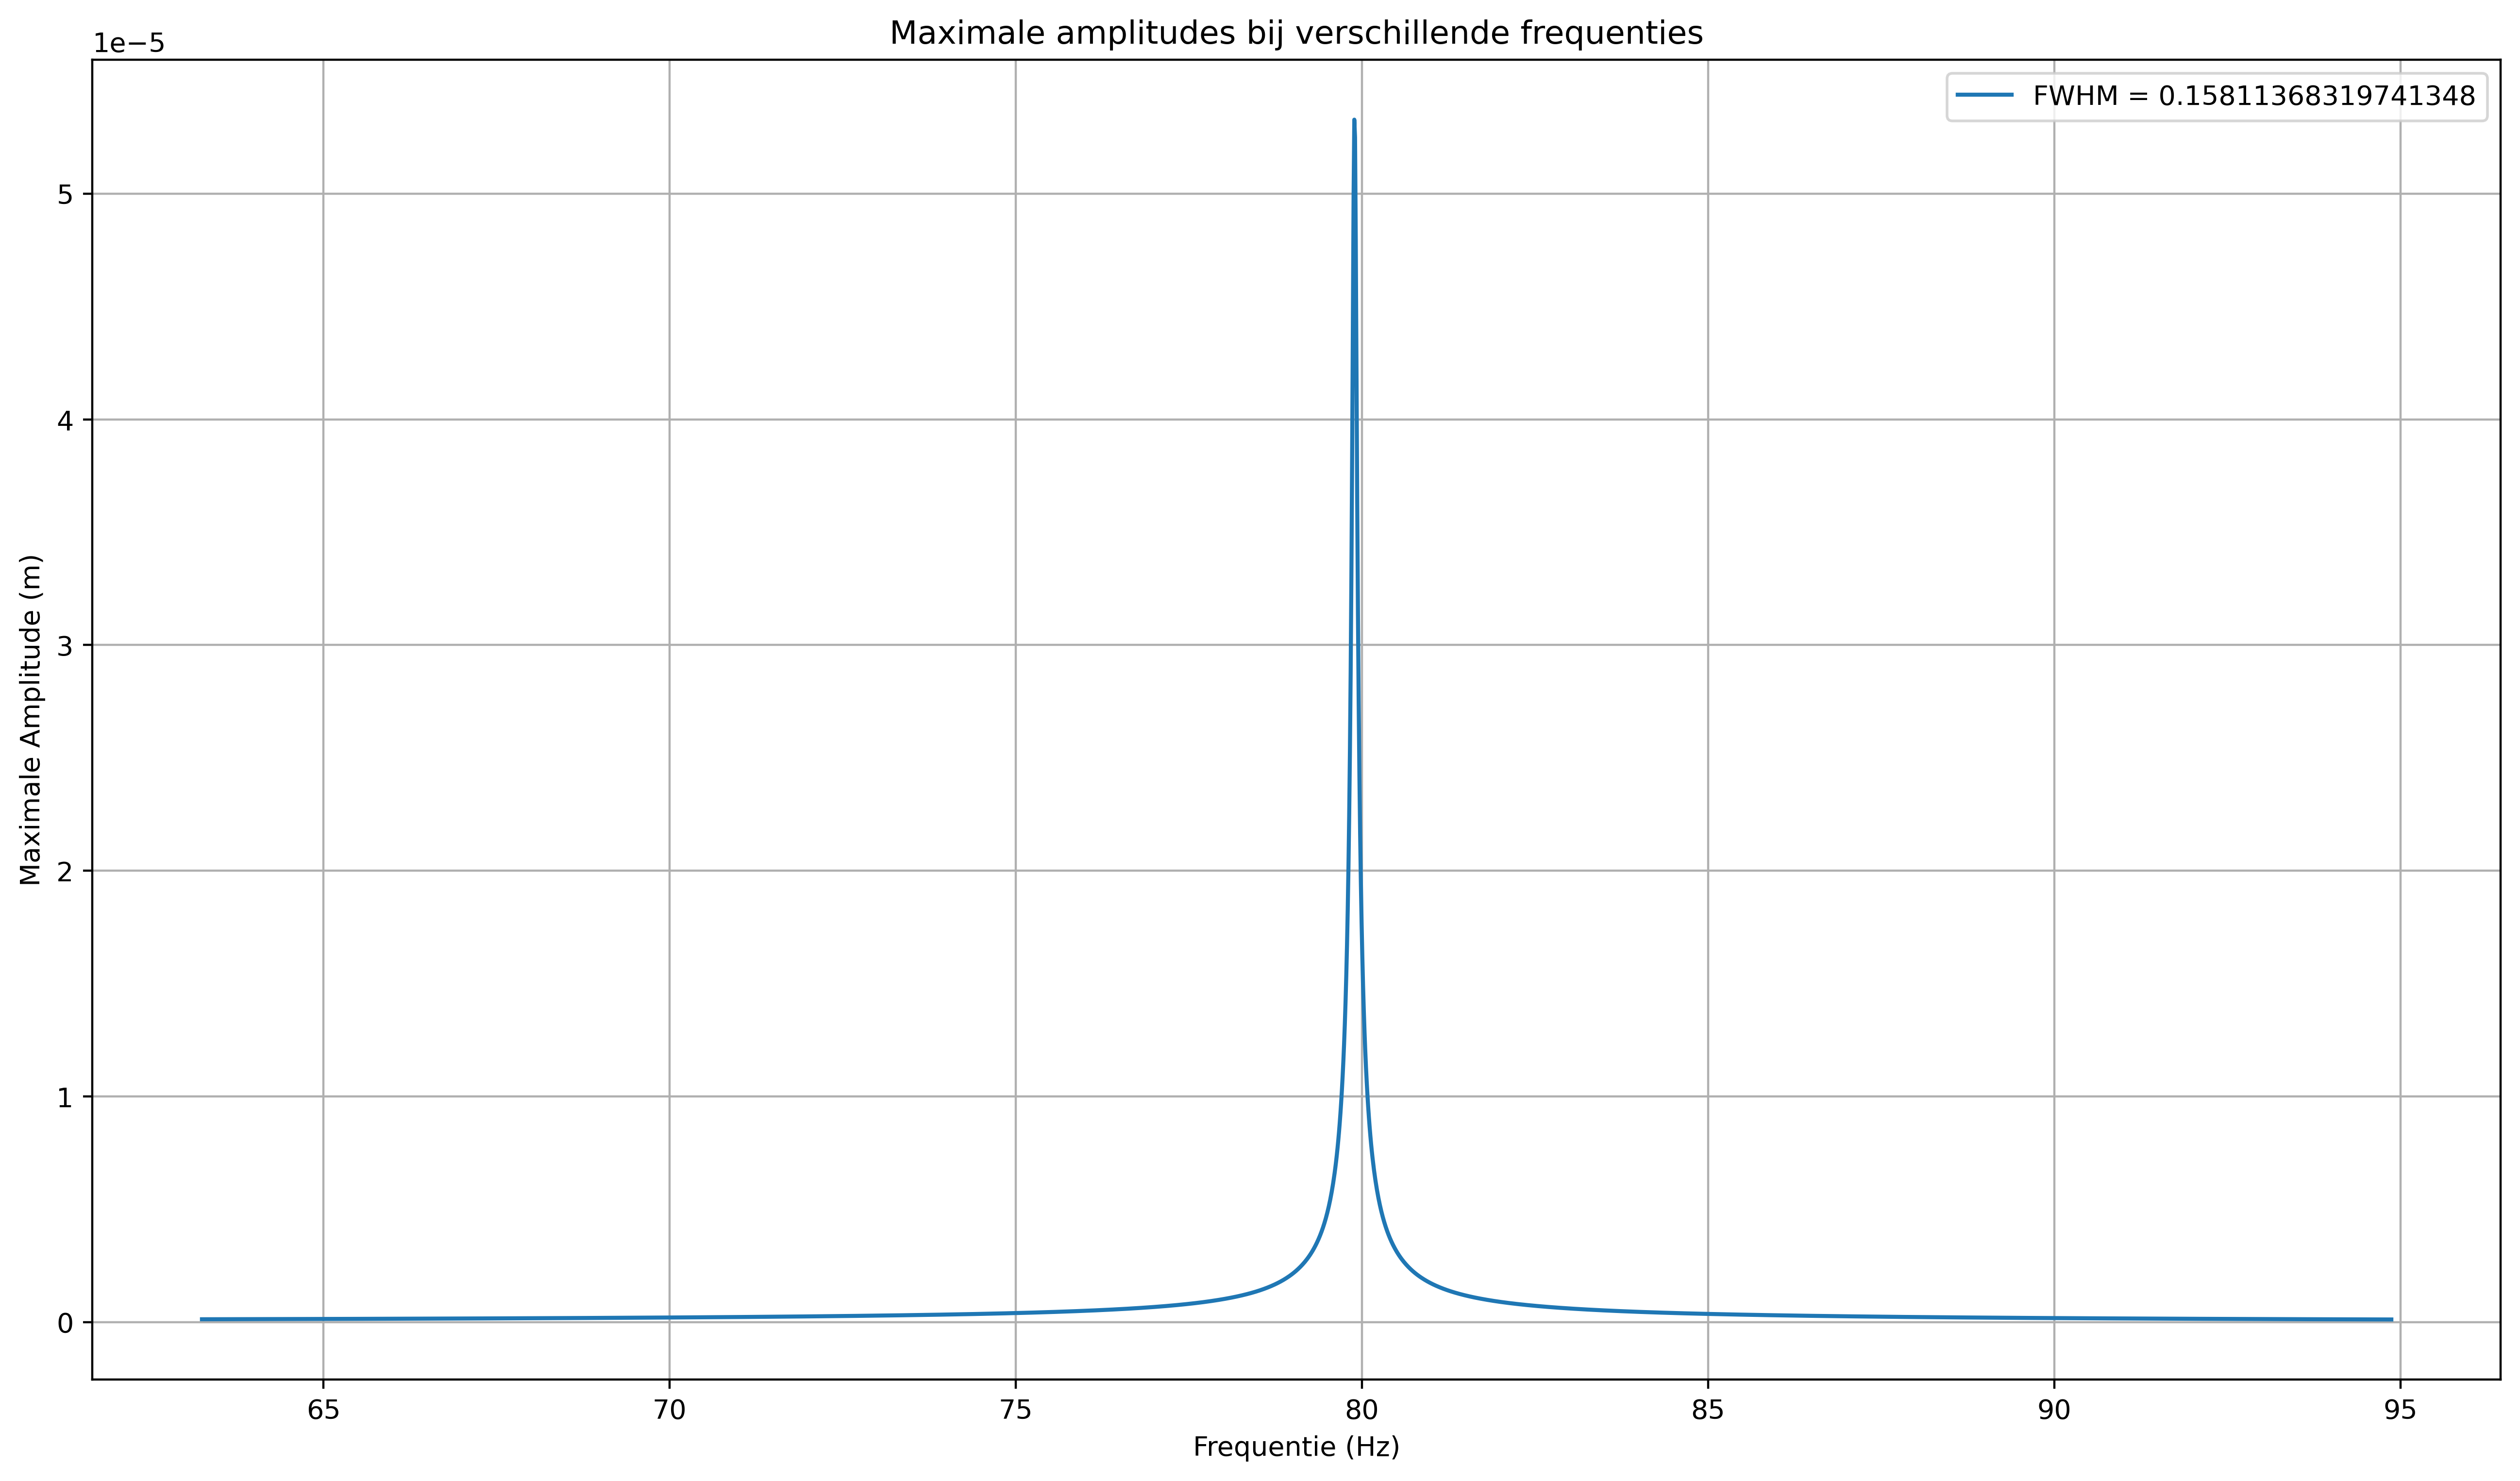

In [46]:
plt.figure(figsize=(16,9), dpi=400)
plt.xlabel("Frequentie (Hz)")
plt.ylabel("Maximale Amplitude (m)")
plt.title("Maximale amplitudes bij verschillende frequenties")
plt.grid()
label=("FWHM")
plt.plot(freqs, MaxAmps, label= "FWHM = " + str(FWHM_top[-1] - FWHM_top[0]))
plt.legend(loc= "upper right")

In [47]:
print(FWHM_range/res_f)

0.002213597159475396


In [63]:
c1 = 2.3297*10**-6 - (2.3297*10**-6)/5 
c2= 2.3297*10**-6 + (2.3297*10**-6)/5 + (2.3297*10**-6)/5 
c3 = 2.3297*10**-6/10
range1 = np.linspace(1, 3, 3)
range2 = np.arange(c1, c2, c3)
print(range2)

[1.86376e-06 2.09673e-06 2.32970e-06 2.56267e-06 2.79564e-06 3.02861e-06]


No handles with labels found to put in legend.


[0.10540912213161846, 0.11595003434477746, 0, 0, 0, 0]


No handles with labels found to put in legend.


[0.10540912213161846, 0.11595003434477746, 0, 0, 0, 0]


No handles with labels found to put in legend.


[0.10540912213161846, 0.11595003434477746, 0.13703185877109547, 0, 0, 0]


No handles with labels found to put in legend.


[0.10540912213161846, 0.11595003434477746, 0.13703185877109547, 0.15811368319741348, 0, 0]


No handles with labels found to put in legend.


[0.10540912213161846, 0.11595003434477746, 0.13703185877109547, 0.15811368319741348, 0.1686545954105867, 0]


No handles with labels found to put in legend.


[0.10540912213161846, 0.11595003434477746, 0.13703185877109547, 0.15811368319741348, 0.1686545954105867, 0.1897364198368905]


ValueError: x and y must have same first dimension, but have shapes (3,) and (6,)

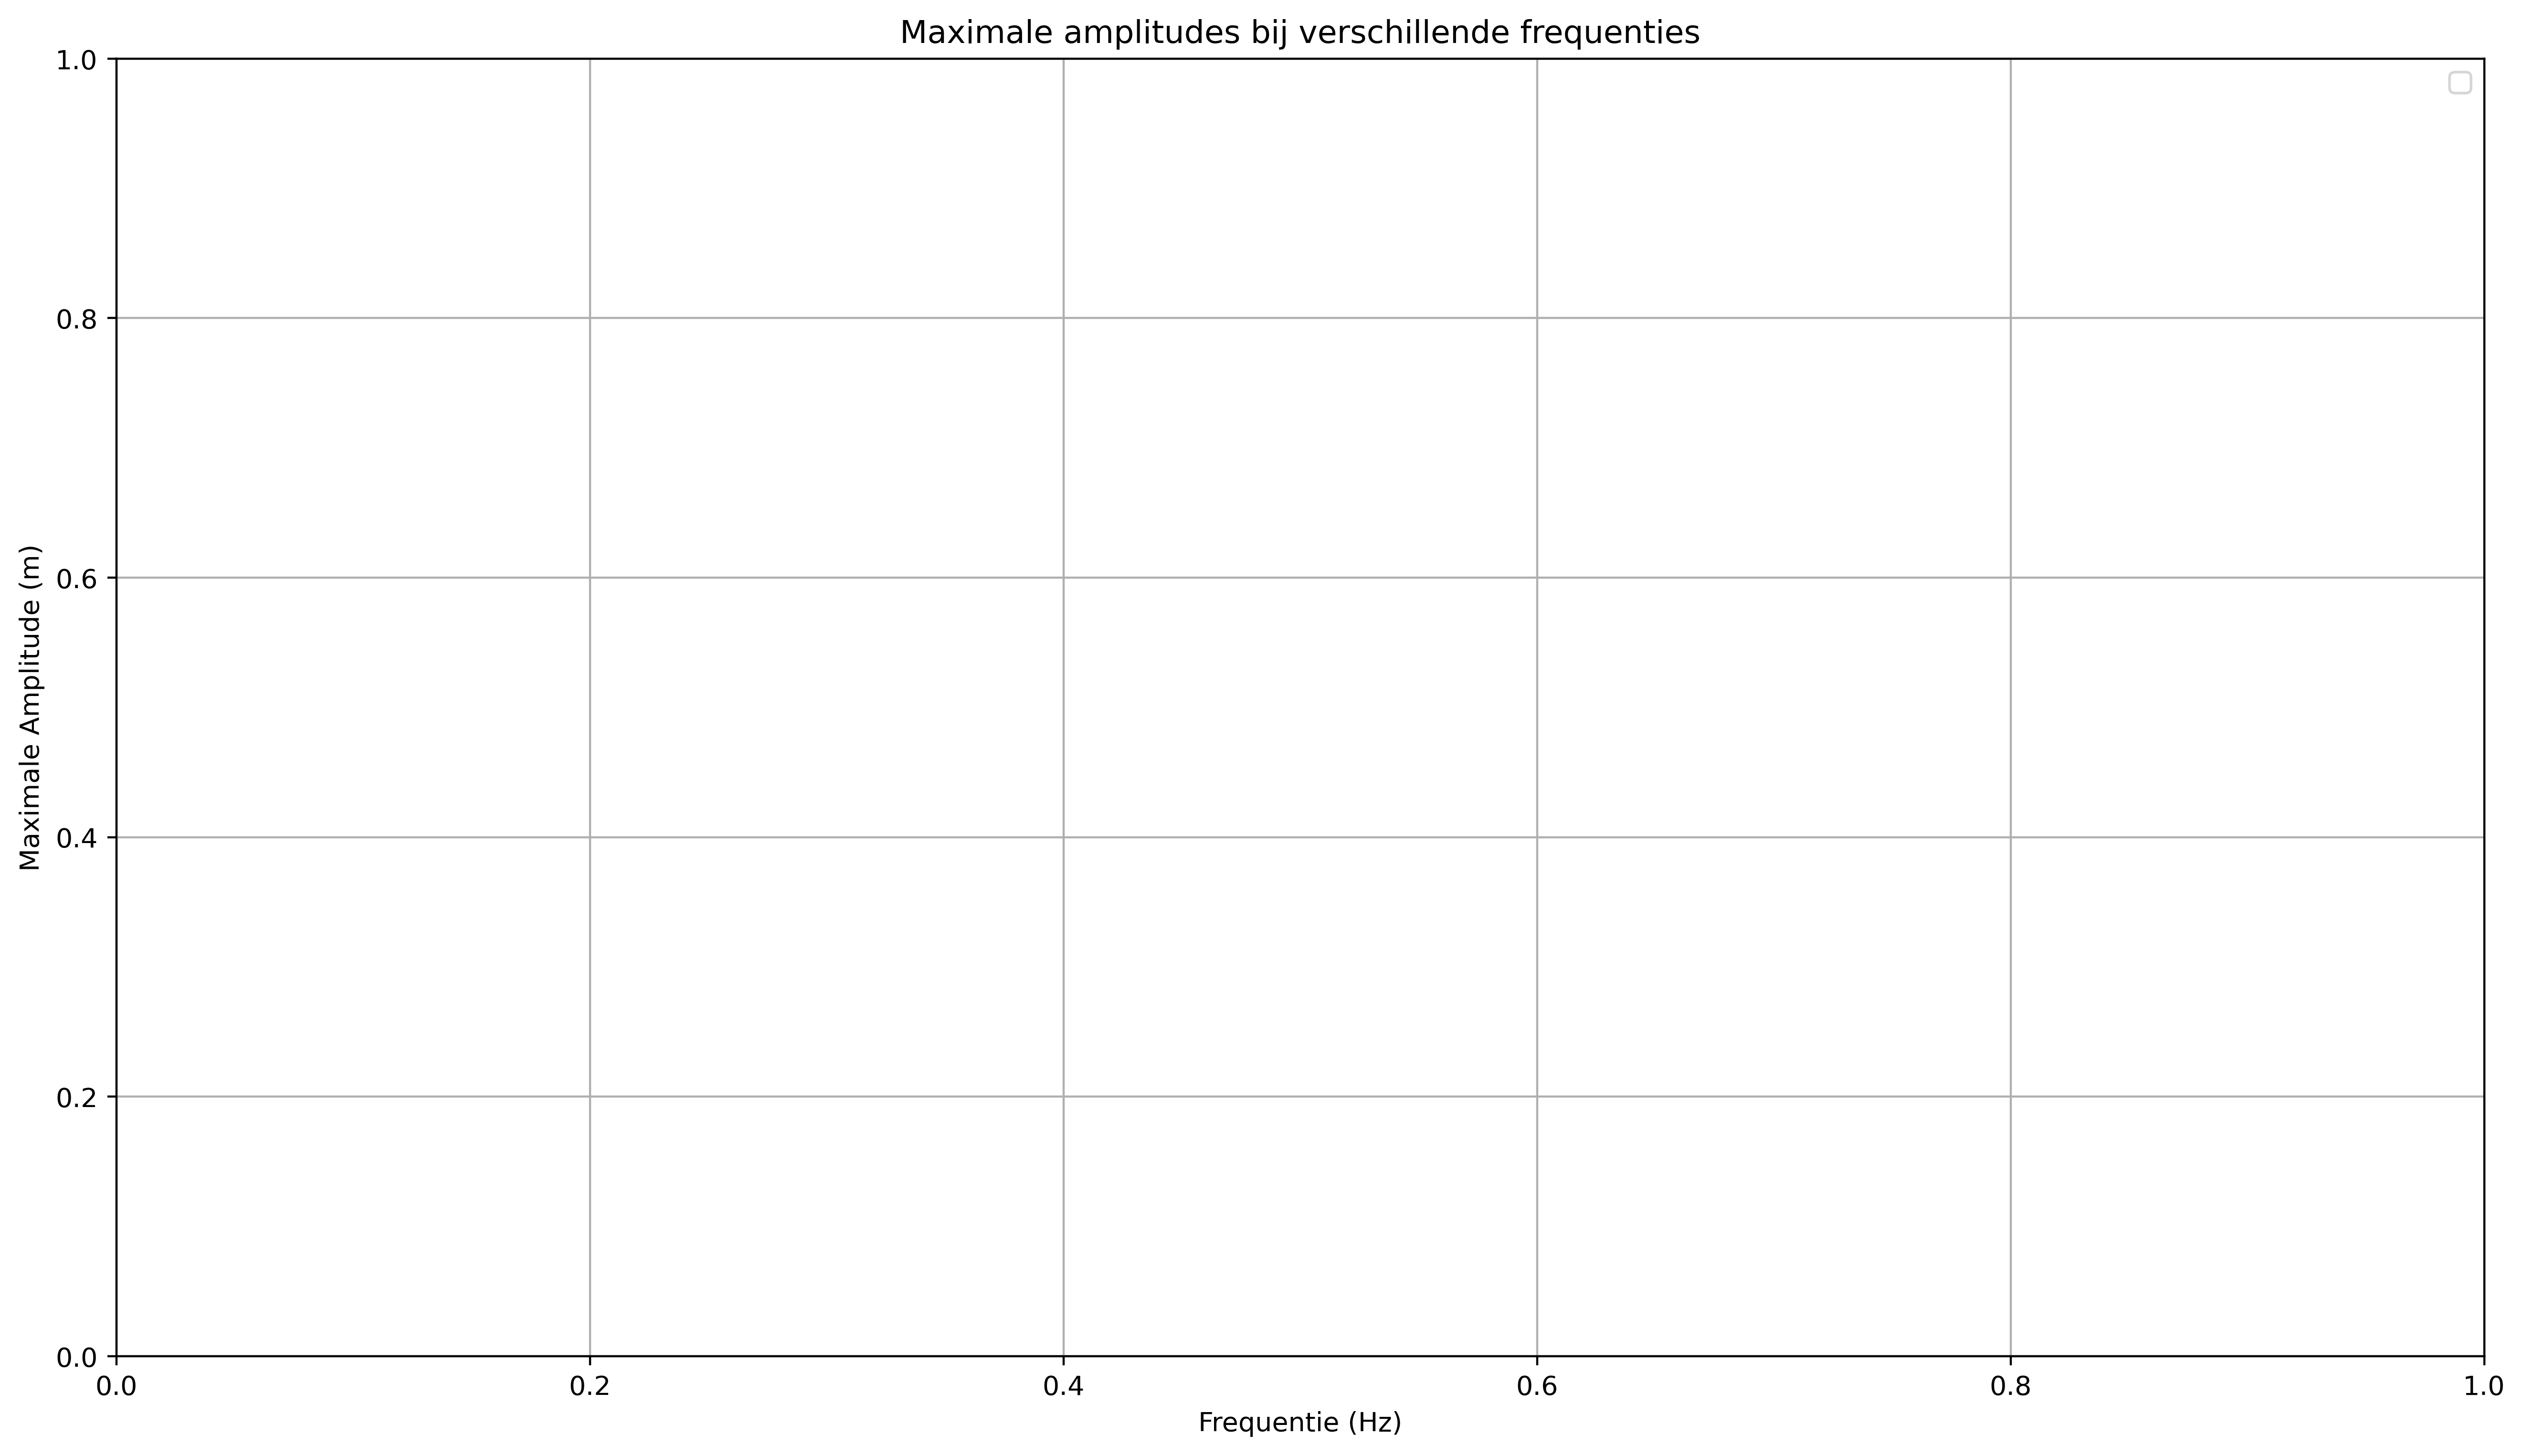

In [61]:
plt.figure(figsize=(16,9), dpi=400)
plt.xlabel("Frequentie (Hz)")
plt.ylabel("Maximale Amplitude (m)")
plt.title("Maximale amplitudes bij verschillende frequenties")
plt.grid()


c = 2.3297*10**-6 - (2.3297*10**-6)/5 - (2.3297*10**-6)/5  #kg/s 

for fc in range(6):
    c =+ c + (2.3297*10**-6)/10
    for fi in range(Nf):
        a = (k - 2*m/(dt**2))/(m/(dt**2)+c/(2*dt))
        b = (m/(dt**2)-c/(2*dt))/(m/(dt**2)+c/(2*dt))
        x[0] = x0
        x[1] = x0+dt*v0
        for ti in range(1,Nstap-1):
            x[ti+1]=-a*x[ti]-b*x[ti-1]+F0e*np.sin(2*np.pi*freqs[fi]*tijd[ti])
        MaxAmps[fi]=np.amax(x[round(0.8*Nstap):-1])
    #plt.plot(freqs, MaxAmps, label="gamma = " + str(c))
    plt.legend(loc='upper right')
    FWHM = np.amax(MaxAmps)/2
    Max_FWHM = FWHM + FWHM/5
    Min_FWHM = FWHM - FWHM/5

    FWHM2 = np.where(np.logical_and(MaxAmps>=Min_FWHM, MaxAmps<=Max_FWHM))
    FWHM_top = freqs[FWHM2]
    FWHM_range[fc] = (FWHM_top[-1] - FWHM_top[0])
    print(FWHM_range)
plt.plot(range2, FWHM_range, label="FWHM_range = " + str(FWHM_range))
plt.show()

In [53]:
FWHM_range2 = [0, 0, 0]
FWHM_range2[0] =  (FWHM_top[-1] - FWHM_top[0])
FWHM_range2[1] =  (FWHM_top[-1] - FWHM_top[0])
FWHM_range2[2] =  (FWHM_top[-1] - FWHM_top[0])

print(FWHM_range2)

[0.10540912213161846, 0.10540912213161846, 0.10540912213161846]


In [69]:
FWHM_range = [0.11595003434477746, 0.15811368319741348, 0.1897364198368905]
print(FWHM_range)

[0.11595003434477746, 0.15811368319741348, 0.1897364198368905]


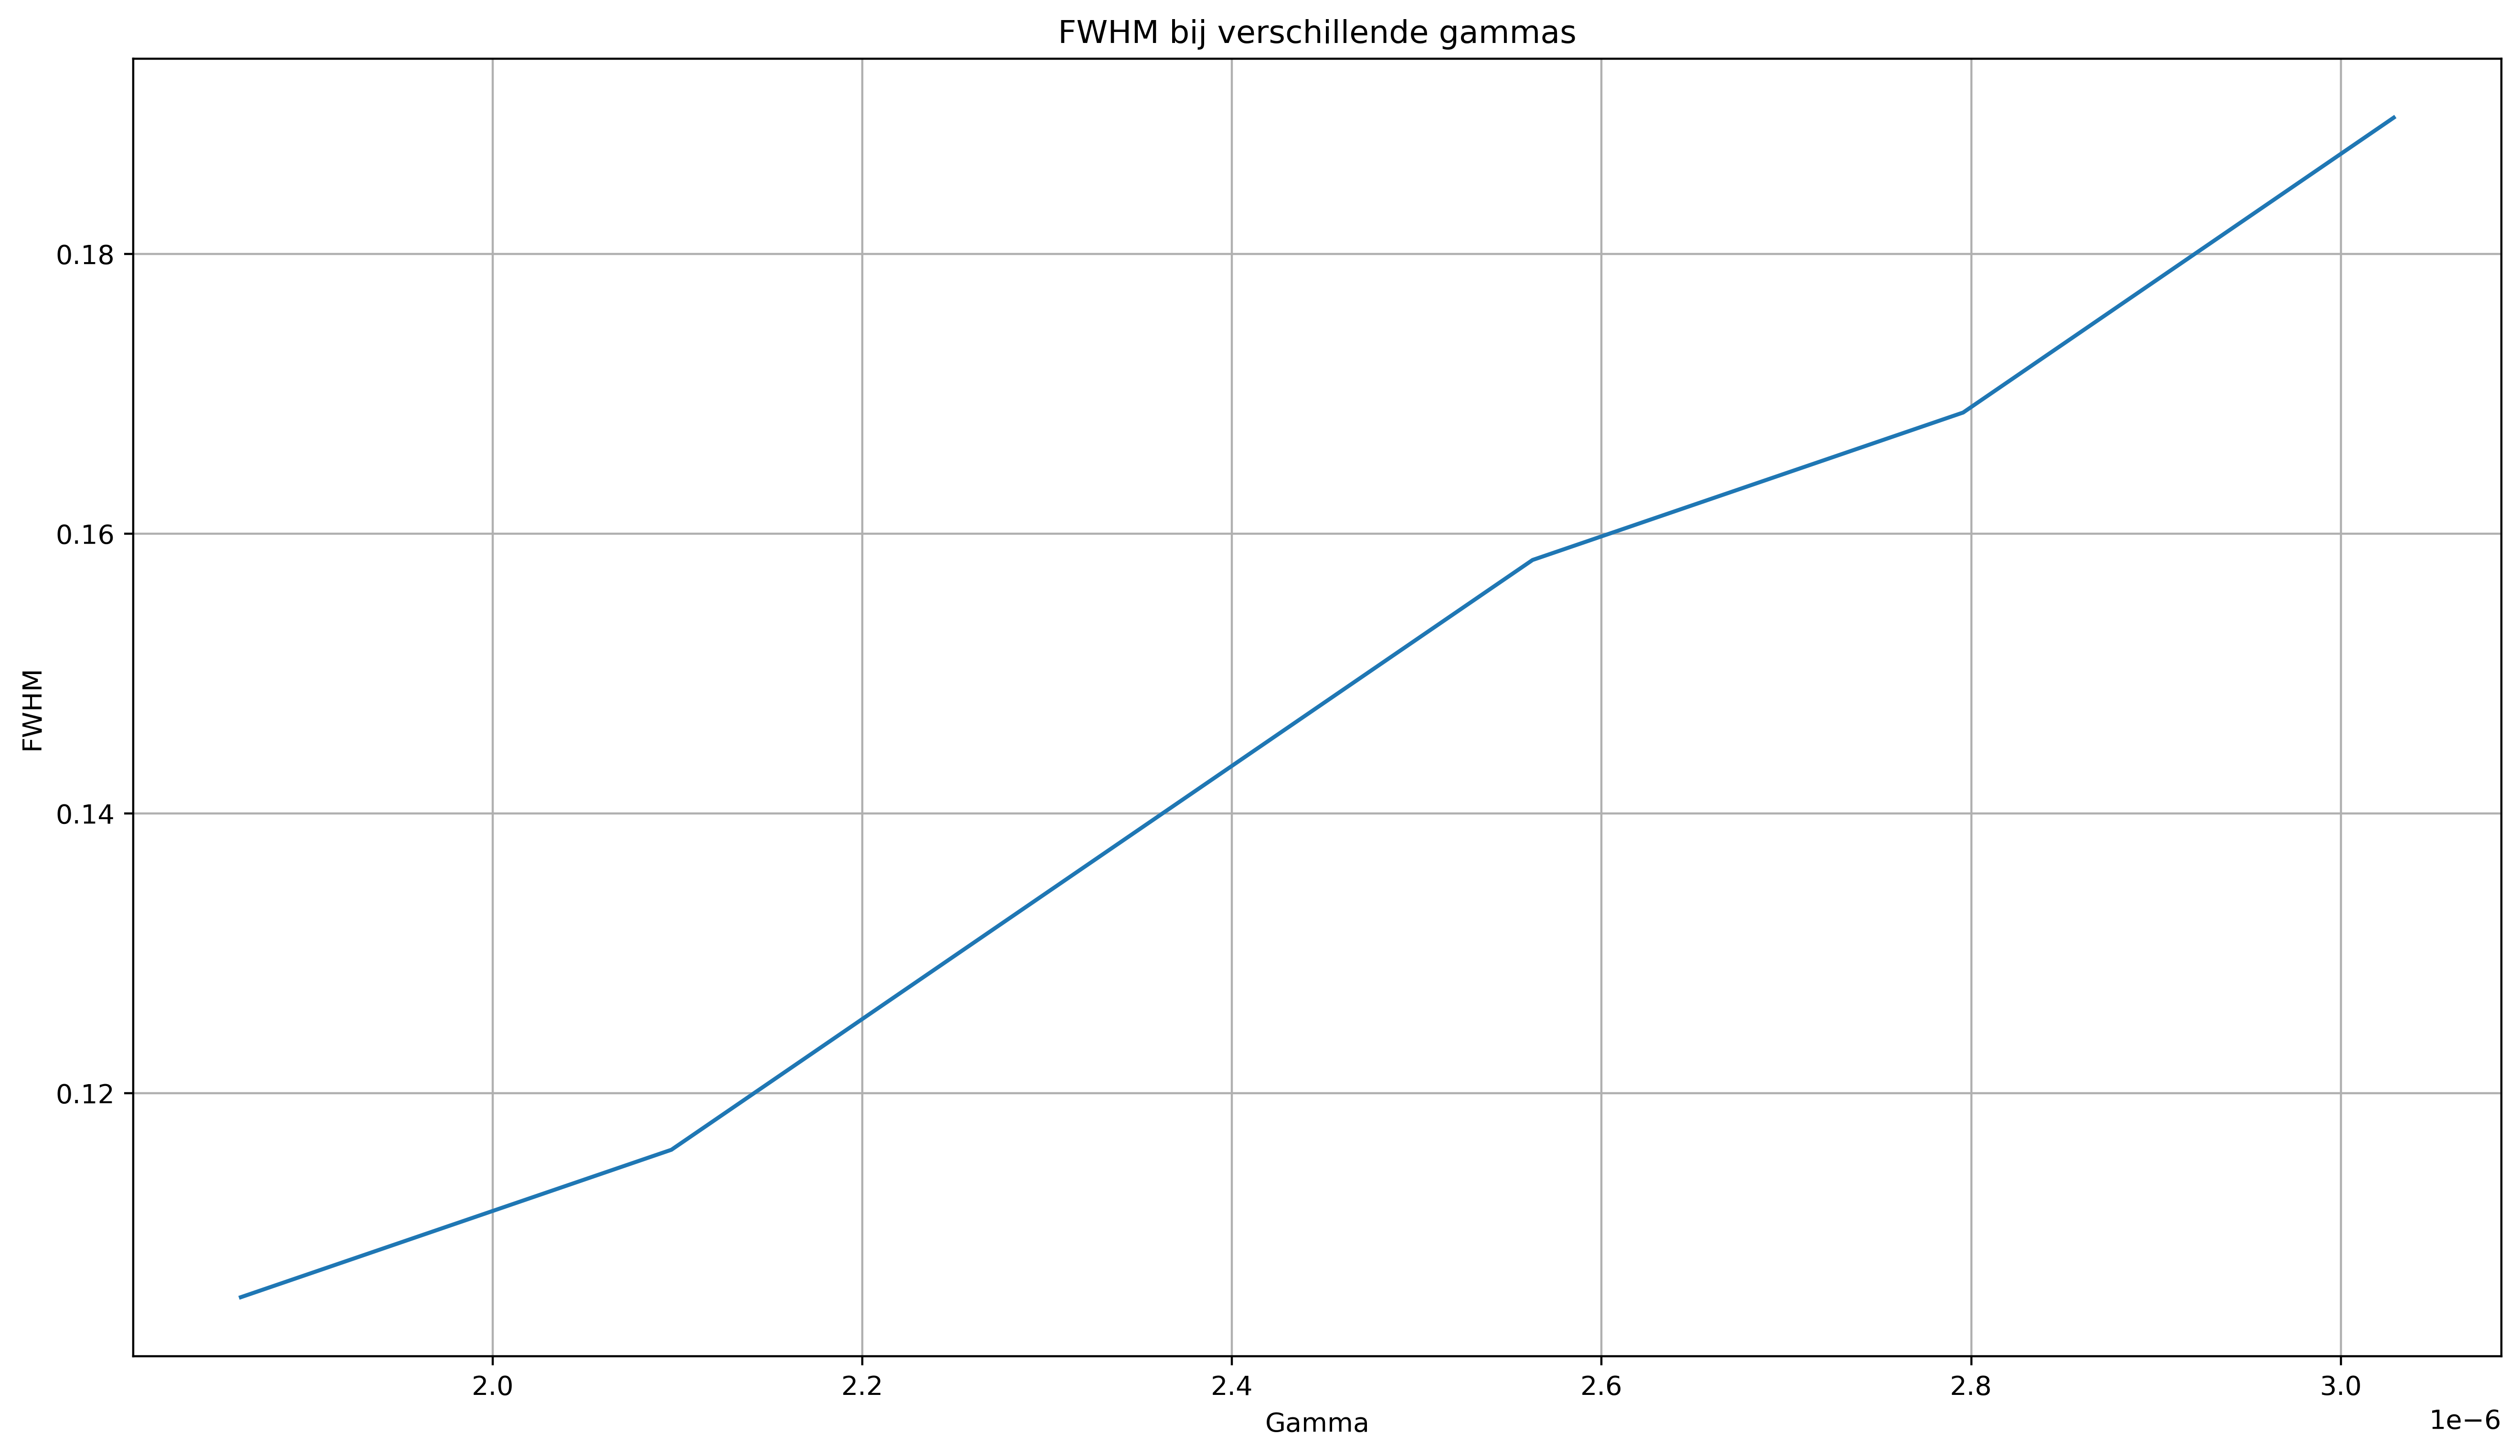

In [64]:
plt.figure(figsize=(16,9), dpi=400)
plt.xlabel("Gamma")
plt.ylabel("FWHM")
plt.title("FWHM bij verschillende gammas")
plt.grid()
plt.plot(range2, FWHM_range, label="FWHM_range = " + str(FWHM_range))


In [104]:
Amp = [0, 0, 0, 0, 0, 0]
c = 2.3297*10**-6 - (2.3297*10**-6)/5 - (2.3297*10**-6)/5  #kg/s 

for fc in range(6):
    c =+ c + (2.3297*10**-6)/10
    #print(c)
    for ti in range(1,Nstap-1):
        a = (k - 2*m/(dt**2))/(m/(dt**2)+c/(2*dt))
        b = (m/(dt**2)-c/(2*dt))/(m/(dt**2)+c/(2*dt))
        x[ti+1]=-a*x[ti]-b*x[ti-1]+F0e*np.sin(2*np.pi*f*tijd[ti])
    Amp[fc] = np.amax(x[round(0.8*Nstap):-1])

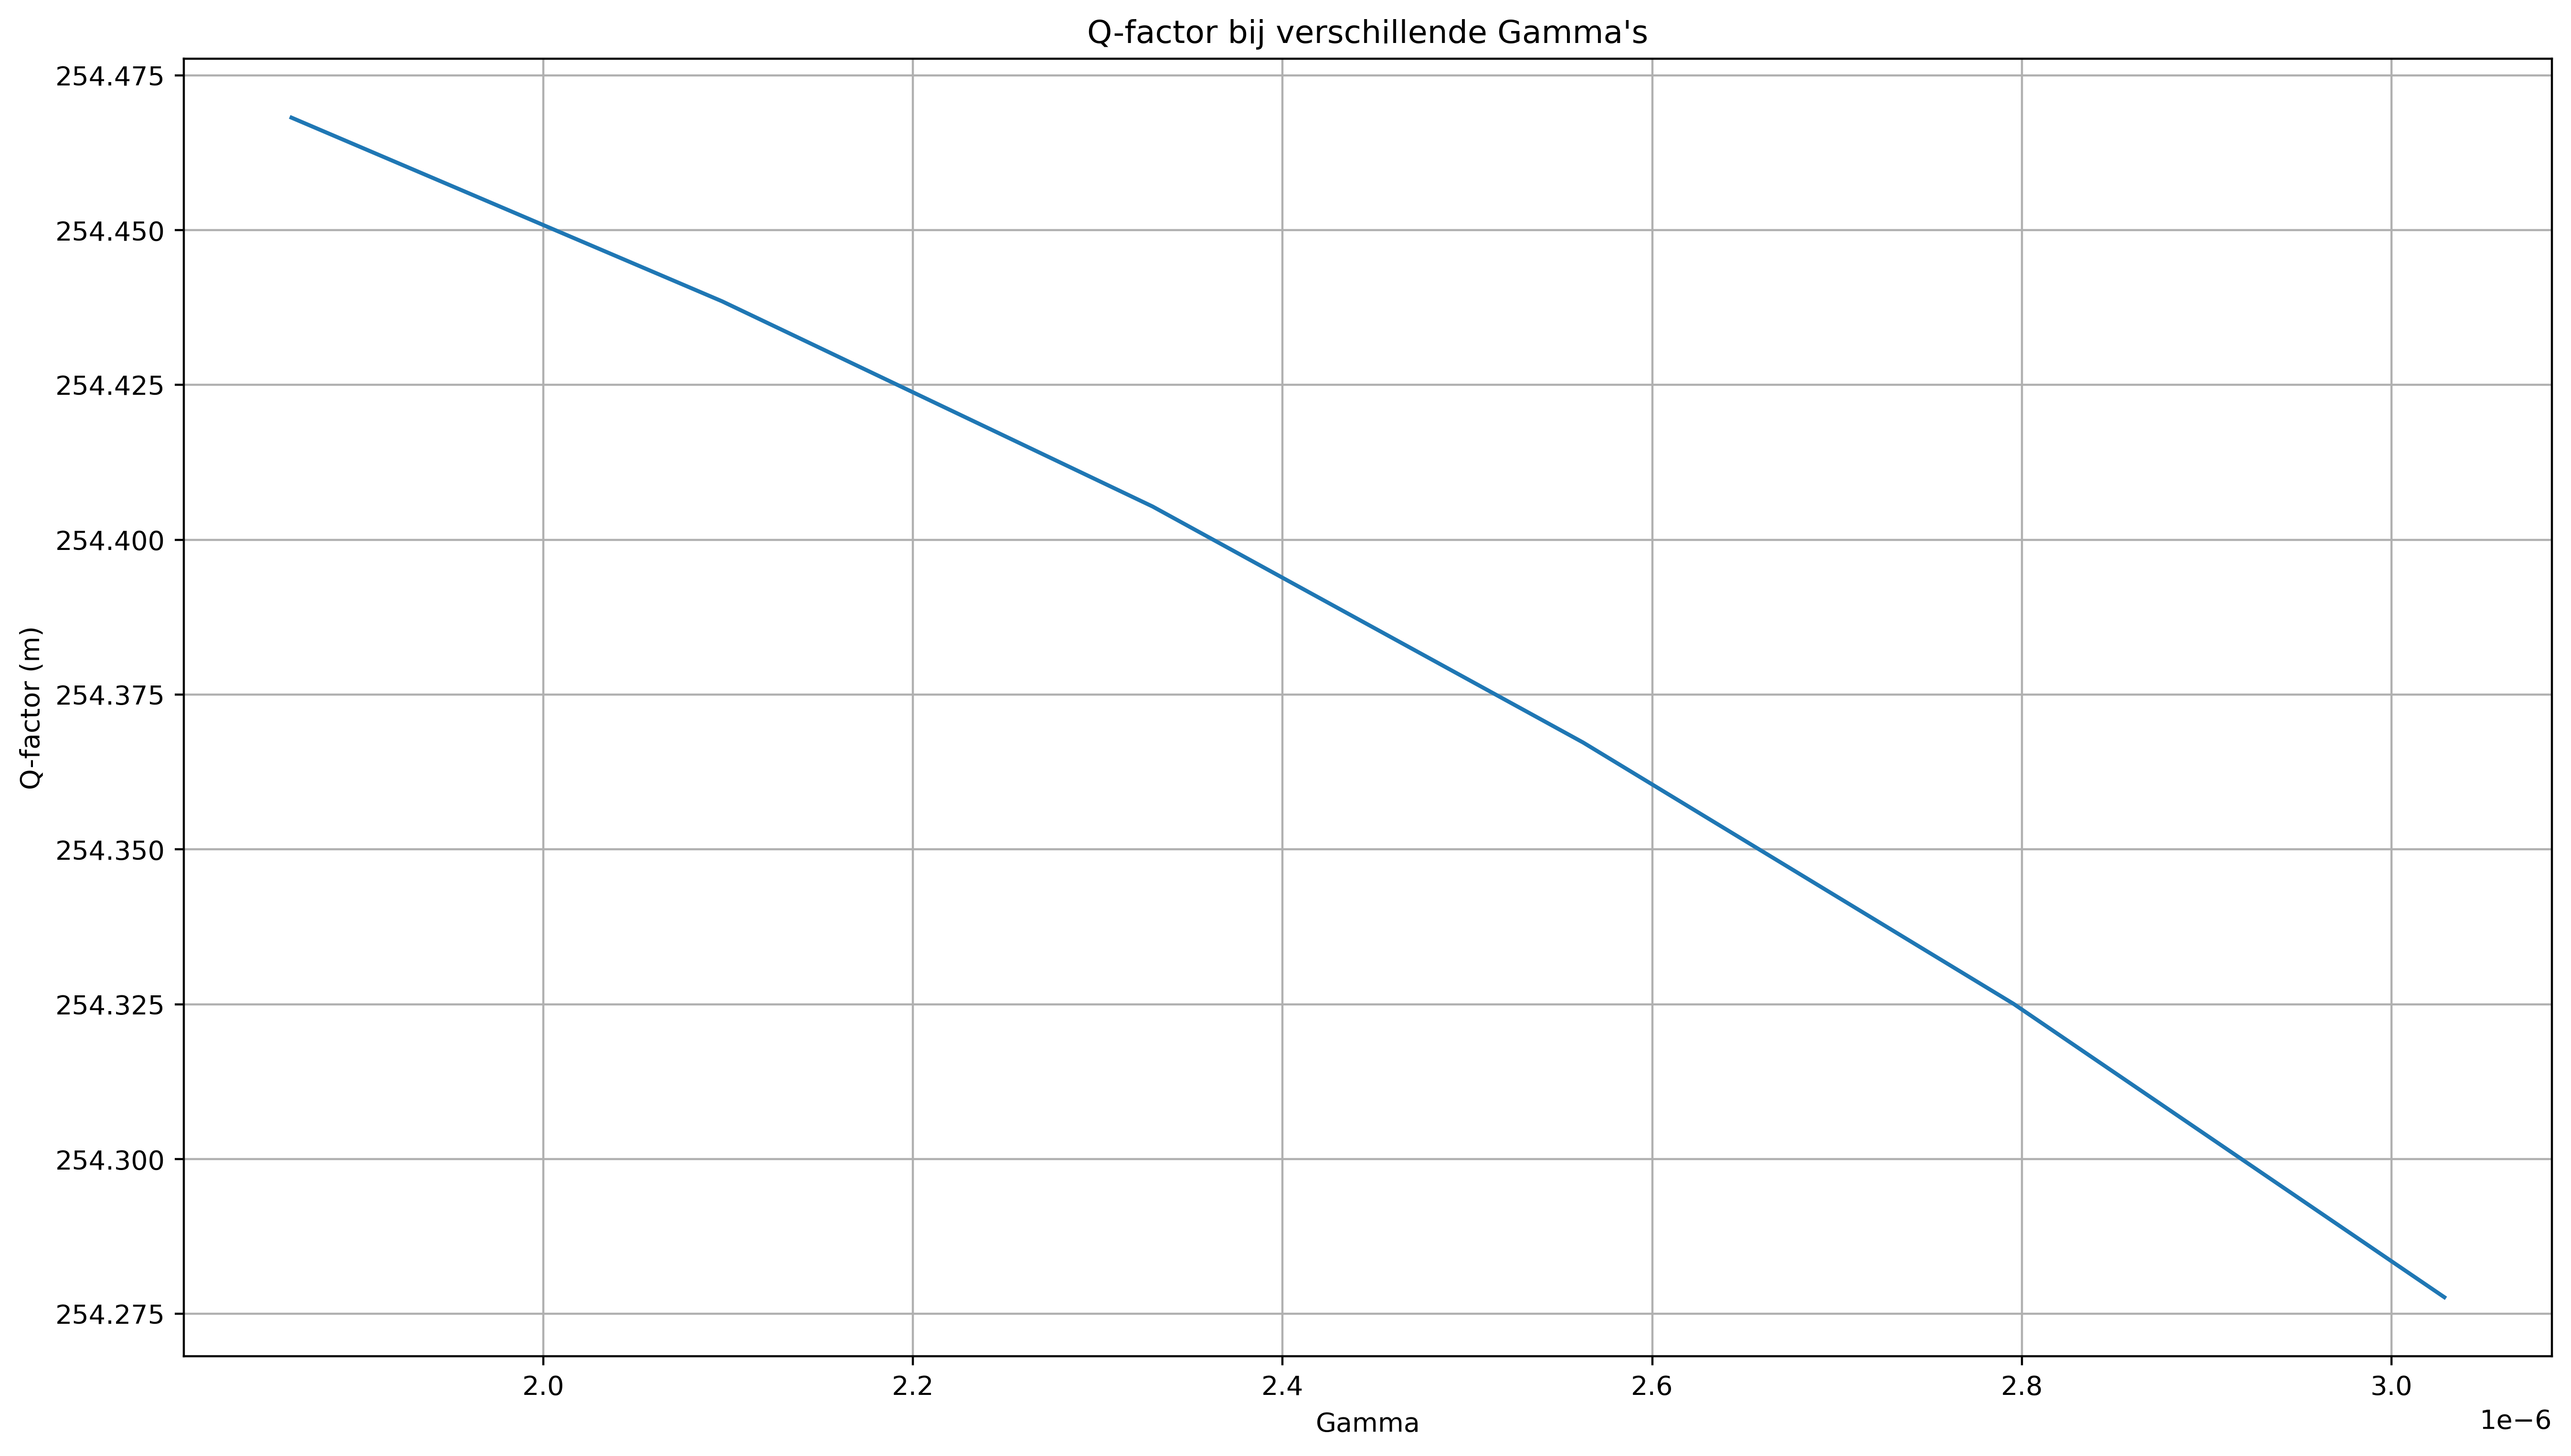

In [103]:
plt.figure(figsize=(16,9), dpi=400)
plt.xlabel("Gamma")
plt.ylabel("Q-factor (m)")
plt.title("Q-factor bij verschillende Gamma's")
plt.grid()
plt.plot(range2, Q_factor)

In [76]:
print(Amp)

[2.2942358883152213e-06, 2.2942358883152213e-06, 2.2942358883152213e-06, 2.2942358883152213e-06, 2.2942358883152213e-06, 2.2942358883152213e-06]


In [92]:
Q_factor = [Amp/uitrekking_veer for Amp in Amp]

In [93]:
print(Q_factor)

[254.46816787383085, 254.43851041852523, 254.40536826556928, 254.3672519481855, 254.32503803526407, 254.2776832378841]
